In [1]:
from keras.datasets import imdb

In [2]:
# 加载 IMDB 数据集
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
# 将整数序列编码为二进制矩阵
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
# 将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
# 画模型
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
# 编译模型
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
# 验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
# 训练
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 30ms/step - loss: 0.5838 - accuracy: 0.7141 - val_loss: 0.4806 - val_accuracy: 0.8274
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3828 - accuracy: 0.8865 - val_loss: 0.3572 - val_accuracy: 0.8607
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2553 - accuracy: 0.9227 - val_loss: 0.3041 - val_accuracy: 0.8802
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1948 - accuracy: 0.9419 - val_loss: 0.2814 - val_accuracy: 0.8901
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1586 - accuracy: 0.9507 - val_loss: 0.2781 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1300 - accuracy: 0.9613 - val_loss: 0.2879 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1067 - accuracy: 0.9685 - val_loss: 0.3013 - val_accuracy: 0.8853
Epoch 8/20
30

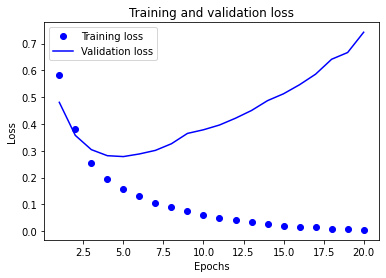

In [9]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()